<a href="https://www.kaggle.com/code/bestohah/notebook032c2170ad?scriptVersionId=99790746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importation and Description

In [2]:
df = pd.read_csv('/kaggle/input/stores-area-and-sales-data/Stores.csv')

A run down of the data sets, basic descriptions such as info, datatypes and measures of central tendencies, I also checked for missing values

In [3]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [5]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [6]:
df.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


In [7]:
# Checking for null values

In [8]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

# EDA

Exploratory Data Analysis to better understand my Data sets

(array([ 10.,  28.,  99., 130., 218., 180., 124.,  76.,  28.,   3.]),
 array([ 775. ,  920.4, 1065.8, 1211.2, 1356.6, 1502. , 1647.4, 1792.8,
        1938.2, 2083.6, 2229. ]),
 <BarContainer object of 10 artists>)

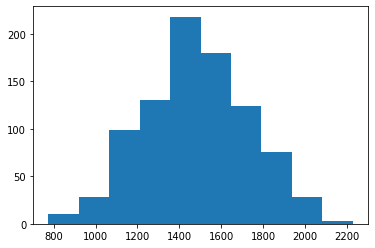

In [9]:
plt.hist(df['Store_Area'])

(array([  9.,  29.,  91., 137., 216., 183., 121.,  75.,  32.,   3.]),
 array([ 932. , 1105.5, 1279. , 1452.5, 1626. , 1799.5, 1973. , 2146.5,
        2320. , 2493.5, 2667. ]),
 <BarContainer object of 10 artists>)

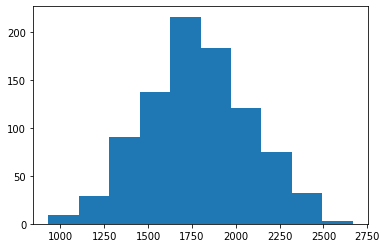

In [10]:
plt.hist(df['Items_Available'])

(array([  7.,  21.,  81., 144., 202., 183., 145.,  74.,  30.,   9.]),
 array([  10.,  165.,  320.,  475.,  630.,  785.,  940., 1095., 1250.,
        1405., 1560.]),
 <BarContainer object of 10 artists>)

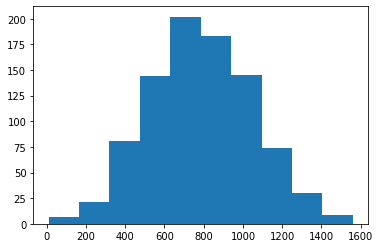

In [11]:
plt.hist(df['Daily_Customer_Count'])

(array([ 13.,  45., 146., 188., 173., 157., 116.,  44.,  13.,   1.]),
 array([ 14920.,  25060.,  35200.,  45340.,  55480.,  65620.,  75760.,
         85900.,  96040., 106180., 116320.]),
 <BarContainer object of 10 artists>)

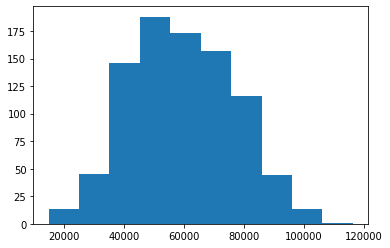

In [12]:
plt.hist(df['Store_Sales'])

<AxesSubplot:xlabel='Store_Area', ylabel='Daily_Customer_Count'>

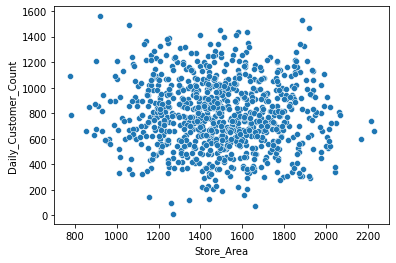

In [13]:
sns.scatterplot(data = df, x = 'Store_Area', y = 'Daily_Customer_Count')

<AxesSubplot:xlabel='Store_Area', ylabel='Store_Sales'>

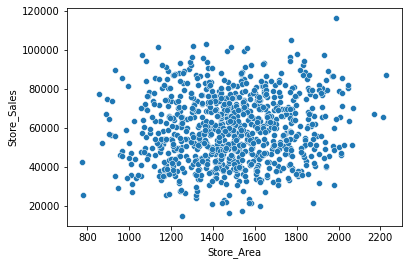

In [14]:
sns.scatterplot(data = df, x = 'Store_Area', y = 'Store_Sales')

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

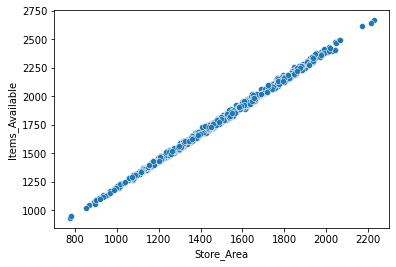

In [15]:
sns.scatterplot(data = df, x = 'Store_Area', y = 'Items_Available')

### There is a strong correlation between the area of the store and items available

# Binning

Binning is when you group values together into bins
.

In [16]:
bins = np.linspace(min(df['Store_Area']), max(df['Store_Area']),5)
group_names = ['Very Small', 'Small', 'Medium', 'Large']
df['store_size'] = pd.cut(df['Store_Area'], bins, labels = group_names, include_lowest = True)

In [17]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,store_size
0,1,1659,1961,530,66490,Medium
1,2,1461,1752,210,39820,Small
2,3,1340,1609,720,54010,Small
3,4,1451,1748,620,53730,Small
4,5,1770,2111,450,46620,Medium


After Binning, a new column is created, grouping the store area into four groups for better understanding and analysis

In [18]:
# Store area of sizes between 775 to 1140 are grouped as Very small stores
# Between 1141 to 1499 as Small stores
# 1500 to 1850 as medium stores, while above 1850 as Large stores

(array([346.,   0.,   0., 419.,   0.,   0.,  68.,   0.,   0.,  63.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

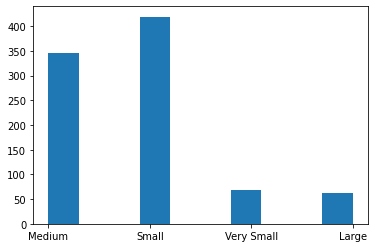

In [19]:
plt.hist(df['store_size'])

# More Data Visualizations

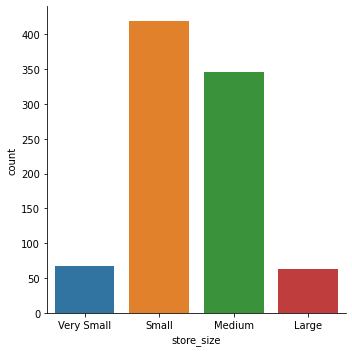

In [20]:
sns.catplot(data = df, x = 'store_size', kind = 'count')

In [21]:
# There are more Small sized stores, closely followed by medium sized stores.

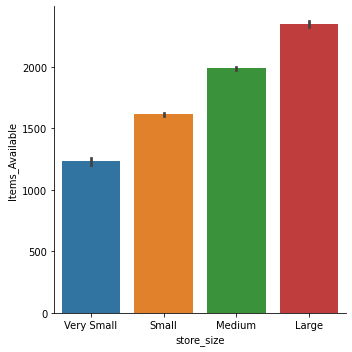

In [22]:
sns.catplot(data = df, x = 'store_size', y = 'Items_Available', kind = 'bar')

In [23]:
# The Larger the store, the more items availale

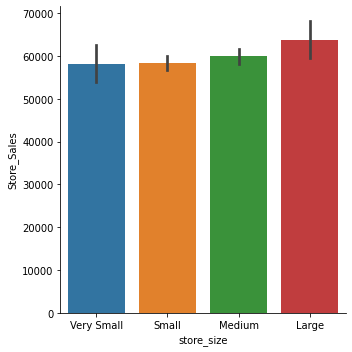

In [24]:
sns.catplot(data = df, x = 'store_size', y = 'Store_Sales', kind = 'bar')

In [25]:
# Store sales was somewhat evenly distributed amongst all stores

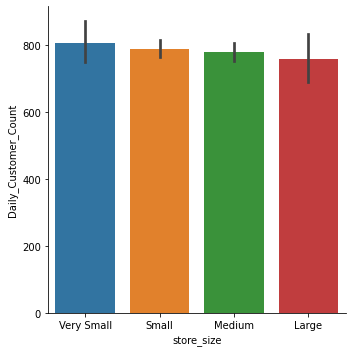

In [26]:
sns.catplot(data = df, x = 'store_size', y = 'Daily_Customer_Count', kind = 'bar')

In [27]:
# the smaller the store size, the more customers it received per day.